# Coded Data Viz and Exploration
This Jupyter notebook is mainly to look at my data now that it has been qualitatively coded!
This is a new, continuing script.

## Qualitative Coding
Unlike coding with something like Python, qualitative coding here is basically just giving an item a discrete value based on some property. In this project, I am looking at how people use algopseak, so my the codes listed in the mention_code column of my CSV/dataframe are split up into four categories of use. 
| Code      | Meaning                                                                                                               |
|-----------|-----------------------------------------------------------------------------------------------------------------------|
| a         | algospeak - The term is being used to censor another term                                                             |
| m         | mention - The term is being mentioned as an algospeak term but not used to censor anything. Can also stand for "meta" |
| n         | not algospeak - The term is not being used as an algospeak term                                                       |
| o         | other - Term is not present or something else                                                                         |

## Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pprint
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Pretty printing has been turned OFF


In [2]:
algo_df = pd.read_csv('algospeak_top_posts.csv')
algo_df.sample(5)

,text,author,display_name,date,likes,quotes,replies,reposts,uri,query,mention_code
128,I’m proud to say I’m blocked on Twitter by the deputy director of the fbi because I made a joke about his head being shaped like a square watermelon 🍉 😎,reggiet.bsky.social,REG-D.M.C,2025-02-24T01:57:30.535Z,87,0,7,3,at://did:plc:ceaymjjzi46oiayn7yylnwer/app.bsky.feed.post/3livaovmtvc26,watermelon,n
31,need some intimacy soon & im not talking about seggs.,naturallylauraj.bsky.social,✨ Optimus Fine ✨,2025-02-25T05:47:02.401Z,21,1,0,6,at://did:plc:dvx2lh53zsz3nxuxp5gomqiu/app.bsky.feed.post/3liy5yaxb222z,seggs,a
44,Wholesome seggs wit Kawakami,tapnsfw.bsky.social,Tap🔞,2025-02-18T01:33:55.304Z,109,0,1,25,at://did:plc:l3a2mezb76yb7idny6mpkr26/app.bsky.feed.post/3lig4l77jvk2z,seggs,a
74,Sonic weights like a grape to Knuckles,nonsafegay.bsky.social,🔞Yagi💫 (4/4 SLOTS),2025-02-25T04:56:21.910Z,27,0,2,9,at://did:plc:c3bja2hepduet5doqgiwxhyk/app.bsky.feed.post/3liy35nczfs2o,grape,n
36,"Maybe the drag queens are not a problem, maybe the pastors are.",charli-steele.bsky.social,Charli Steele / Transitional Metal Works,2025-02-22T21:31:49.530Z,39,0,2,7,at://did:plc:kgbrrpoitwocwfstwgx2d5r7/app.bsky.feed.post/3lisbevn2dk2p,seggs,o


In [3]:
# Here you can see the mention codes with context
algo_df[['text','query', 'mention_code']].sample(5)

,text,query,mention_code
120,"Sandia (Watermelon) Mountains ~\nAfter a fresh snowfall, the mountain turned a gorgeous shade of 'watermelon' when the setting sun hit it just right. \n#MountainMonday #winter #EastCoastKin #landscape #photography",watermelon,n
19,"Cw: suicide\n\nYou don’t have to say “unalive” here. You don’t have to say “sewercide” or any other euphemism here. Use the actual word, and you have the added bonus of it hitting someone’s mute words so they don’t see it if it’s triggering",unalive,m
97,"Explaining. Misha Collins at Cross Roads 8 in Birmingham, UK. April 2024.\n\n#MishaCollins #CR8 #CrossRoads8 #SPN",palm colored,o
130,watermelon Suga high 🍉,watermelon,n
118,"On March 13, 1944, she became the first Canadian to perform at New York's Town Hall. One year later, she signed with Columbia Concerts. She also appeared in the NFB film This Is Canada.\nThroughout the next two years she toured Central America, Europe and the USA.\n\n🧵10/16",palm colored,o


In [4]:
algo_df.mention_code.value_counts()

mention_code
a    49
n    48
o    41
m    10
Name: count, dtype: int64

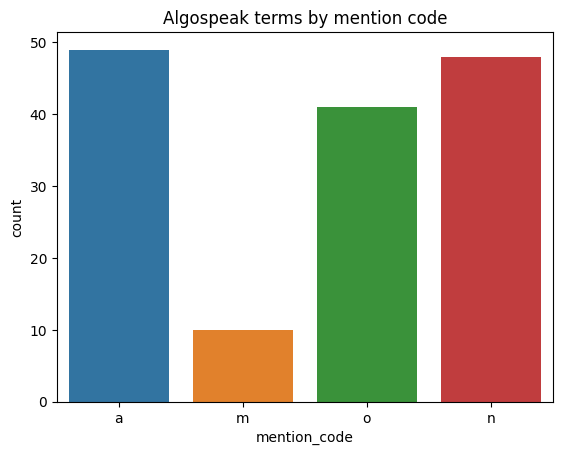

<Figure size 640x480 with 0 Axes>

In [28]:
sns.countplot(x = 'mention_code', hue='mention_code', data = algo_df).set_title('Algospeak terms by mention code')
plt.show()
plt.savefig('terms_by_code.png')

You can see here that there wasn't a ton of metadiscourse about algopseak in this sample, but there is a lot of stuff that isn't algospeak here

In [6]:
code_by_term = algo_df.groupby('query').mention_code.value_counts().unstack()
code_by_term

mention_code,a,m,n,o
query,,,,
grape,NaN,NaN,27.0,3.0
palm colored,2.0,1.0,NaN,27.0
seggs,26.0,1.0,NaN,3.0
unalive,21.0,8.0,NaN,NaN
watermelon,NaN,NaN,21.0,8.0


In [7]:
code_by_term = code_by_term.fillna(0)
code_by_term

mention_code,a,m,n,o
query,,,,
grape,0.0,0.0,27.0,3.0
palm colored,2.0,1.0,0.0,27.0
seggs,26.0,1.0,0.0,3.0
unalive,21.0,8.0,0.0,0.0
watermelon,0.0,0.0,21.0,8.0


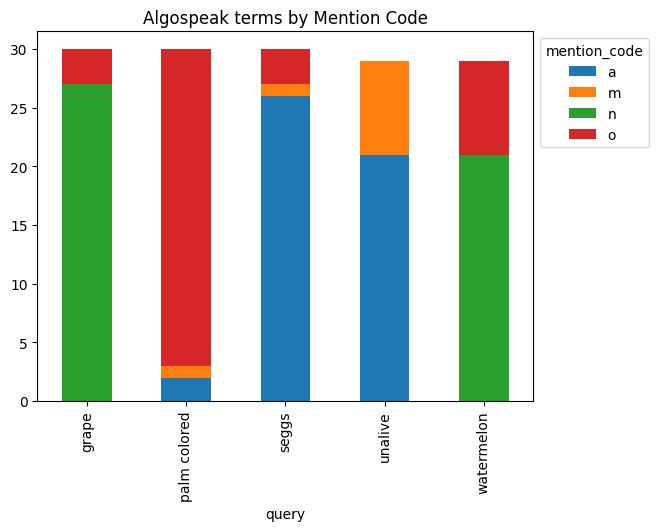

In [30]:
ax = code_by_term.plot(kind='bar', stacked=True)
ax.set_title('Algospeak terms by Mention Code')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('terms_by_code_stacked.png')

There's a big difference between the terms! There are no algospeak uses for grape or watermelon here, and only a couple for palm-colored. Unalive is really the only term that is unambiguously algospeak in this small dataset.

## Looking at the "unalive" dataset
Coded the same way but it's just unalive now

In [9]:
unalive_df = pd.read_csv('unalive_top_posts.csv')
unalive_df.sample(10)

,text,author,display_name,date,likes,quotes,replies,reposts,uri,url,reply_to,reply_to_uri,reply_to_url,query,mention_code
80,"I’m really sorry, but I have to unalive you and stuff…",asterbun.bsky.social,Aster,2025-04-07T17:01:53.415Z,2,0,1,0,at://did:plc:ecmtg7qhkfhtmwtbrwf73o66/app.bsky.feed.post/3lmagsq3pus2k,https://bsky.app/profile/did:plc:ecmtg7qhkfhtmwtbrwf73o66/post/3lmagsq3pus2k,Yes,at://did:plc:ecmtg7qhkfhtmwtbrwf73o66/app.bsky.feed.post/3lmagal5vu223,https://bsky.app/profile/did:plc:ecmtg7qhkfhtmwtbrwf73o66/post/3lmagal5vu223,unalive,a
4,"That happened the moment we let these companies forced creators and content-makers to use the word ""unalive"". FUCK THAT! People die, people get killed, people commit suicide. Use words. Don't pander to that nonsense.",jayej330.bsky.social,"Jayleigh ""Jaye"" Jimenez",2025-04-14T08:57:07.765Z,29,0,1,0,at://did:plc:r6coggh5qqmqrqvrpitb7khu/app.bsky.feed.post/3lmr6ye3esc2m,https://bsky.app/profile/did:plc:r6coggh5qqmqrqvrpitb7khu/post/3lmr6ye3esc2m,Yes,at://did:plc:uqppyrcon566pkrszusjonav/app.bsky.feed.post/3lmr67dl25c2s,https://bsky.app/profile/did:plc:uqppyrcon566pkrszusjonav/post/3lmr67dl25c2s,unalive,m
160,Literally top tier Reylo meme. If you no longer see the meme in circulation assume I am unalive,mythchild.bsky.social,NaN,2025-03-20T11:49:50.729Z,4,0,0,0,at://did:plc:gyndakiefyp6vkvt3nwuyzri/app.bsky.feed.post/3lksmy6hkkc25,https://bsky.app/profile/did:plc:gyndakiefyp6vkvt3nwuyzri/post/3lksmy6hkkc25,Yes,at://did:plc:4ffj3kf7ygdfs37dtlqljarj/app.bsky.feed.post/3lksi577utc2p,https://bsky.app/profile/did:plc:4ffj3kf7ygdfs37dtlqljarj/post/3lksi577utc2p,unalive,a
117,NaN,blisterpearl.bsky.social,scha·den·freu·de,2025-03-25T23:54:36.085Z,374,5,15,43,at://did:plc:ecqey3hdtvj7x4fqs5egqr2w/app.bsky.feed.post/3llahsqmosc2g,https://bsky.app/profile/did:plc:ecqey3hdtvj7x4fqs5egqr2w/post/3llahsqmosc2g,No,NaN,NaN,unalive,n
6,I’m really concerned that he is unalive.,onecaliberal.bsky.social,💙abcdef,2025-04-12T02:00:31.182Z,10,0,0,0,at://did:plc:ntmsgipllqrkrupxn3smmgyg/app.bsky.feed.post/3lmlgrkkoak2v,https://bsky.app/profile/did:plc:ntmsgipllqrkrupxn3smmgyg/post/3lmlgrkkoak2v,Yes,at://did:plc:ca5og5dzdlmoedpdbpbtkkeo/app.bsky.feed.post/3lmlfrjacls2z,https://bsky.app/profile/did:plc:ca5og5dzdlmoedpdbpbtkkeo/post/3lmlfrjacls2z,unalive,a
70,"I cannot imagine how bored I would have to be to decide that I want to be mad at asexual people.\n\n“Hey, Brynnleigh, it’sTampa! I just heard that Kourtlynne harbors no sexual intentions for Carnegie Mellon!” \n\n“OMG that bytch! GURL we so gotta tell Berkeley and Bristol so we can totes unalive her!”",bvlikeslinguica.bsky.social,AFairlySaneBenjamin,2025-04-06T18:51:12.405Z,20,0,1,0,at://did:plc:hlj2gccffqggm4wa32lvqacm/app.bsky.feed.post/3lm64hbrgl22j,https://bsky.app/profile/did:plc:hlj2gccffqggm4wa32lvqacm/post/3lm64hbrgl22j,Yes,at://did:plc:4ltsypfv32qohdmrehmmilzq/app.bsky.feed.post/3lm62v35c3s2k,https://bsky.app/profile/did:plc:4ltsypfv32qohdmrehmmilzq/post/3lm62v35c3s2k,unalive,m
141,"The richest man in the world has hair plugs, a plastic jawline, an unalive frankenpenis, and... Moobs.\n\nMoney can't buy everything. 🤷🏼‍♂️",bdemayo.bsky.social,Bill DeMayo,2025-03-22T10:47:35.765Z,105,0,12,25,at://did:plc:h4kbkaqns7u6vamriwdrjqpc/app.bsky.feed.post/3lkxkgph6ms2m,https://bsky.app/profile/did:plc:h4kbkaqns7u6vamriwdrjqpc/post/3lkxkgph6ms2m,No,NaN,NaN,unalive,a
44,"Yeah, it is usually Stardust Crusaders that gets people to get into JoJo\n\nJust wait until The Egyptian God Cards start to show up--roughly after a card game to the [unalive] is a major conflict",katrinathelamia.bsky.social,Katrina T. Lamia,2025-04-14T06:13:35.471Z,2,0,0,0,at://did:plc:wspk6rwf7sht7cbf5afow6fe/app.bsky.feed.post/3lmqvtwdvhk2g,https://bsky.app/profile/did:plc:wspk6rwf7sht7cbf5afow6fe/post/3lmqvtwdvhk2g,Yes,at://did:plc:qc6xzgctorfsm35w6i3vdebx/app.bsky.feed.post/3lmq7idw2ds2t,https://bsky.app/profile/did:plc:qc6xzgctorfsm35w6i3vdebx/post/3lmq7idw2ds2t,unalive,a
155,"If you lo

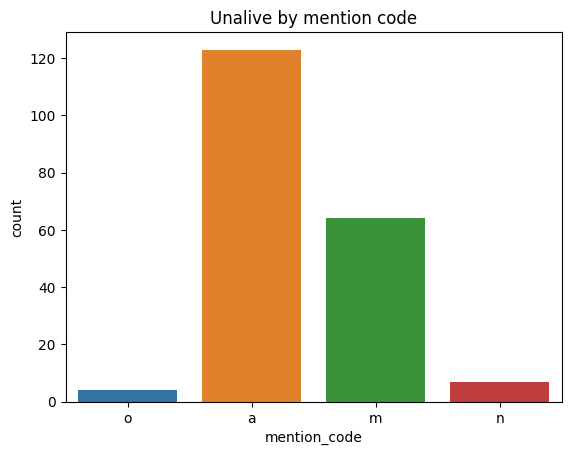

<Figure size 640x480 with 0 Axes>

In [31]:
sns.countplot(x = 'mention_code', hue='mention_code', data = unalive_df).set_title('Unalive by mention code')
plt.show()
plt.savefig('unalive_by_code.png')

In [15]:
likes_by_code = unalive_df.groupby('mention_code')[['likes', 'quotes', 'replies']].mean()
likes_by_code

,likes,quotes,replies
mention_code,,,
a,17.325203,0.373984,1.357724
m,41.140625,0.468750,2.218750
n,84.142857,0.857143,4.000000
o,77.750000,0.000000,0.500000


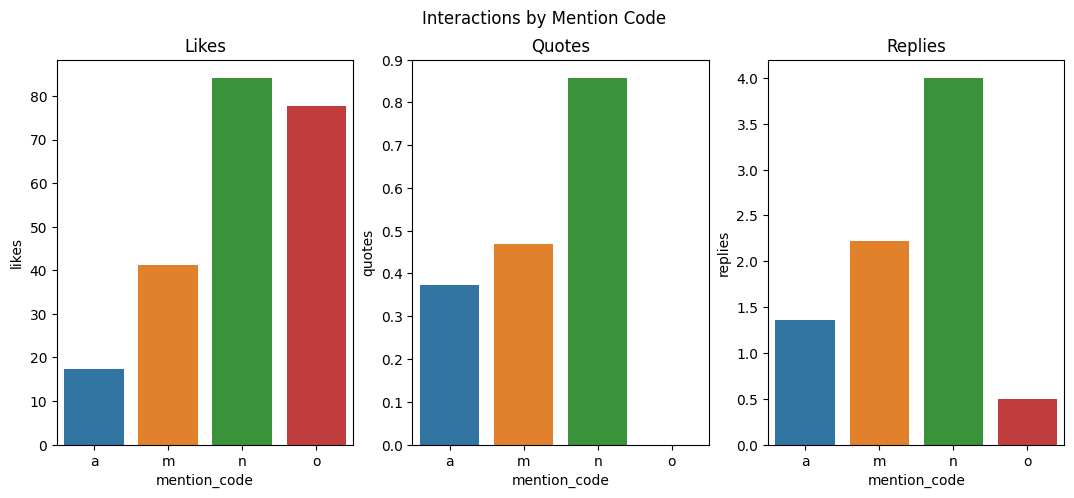

In [32]:
fig, ax = plt.subplots(1, 3, sharex = True, figsize=(13,5))
fig.suptitle('Interactions by Mention Code')
ax[0].set_title('Likes')
ax[1].set_title('Quotes')
ax[2].set_title('Replies')
sns.barplot(x = 'mention_code', y = 'likes', hue='mention_code', data=likes_by_code, ax=ax[0])
sns.barplot(x = 'mention_code', y = 'quotes', hue='mention_code', data=likes_by_code, ax=ax[1])
sns.barplot(x = 'mention_code', y = 'replies', hue='mention_code', data=likes_by_code, ax=ax[2])
plt.savefig('interactions_by_mention_code.png')